In [87]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoLars,lars_path
from sklearn import datasets
import ipywidgets as widgets
from ipywidgets import IntSlider
from ipywidgets.embed import embed_data
import nbinteract as nbi

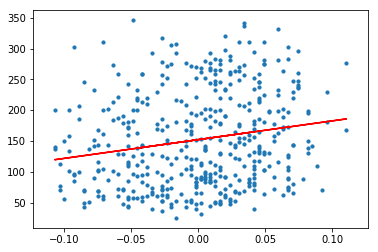

In [162]:
ALPHA = 0
MAX_ITER = 1
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
reg = LassoLars(alpha=ALPHA,max_iter=MAX_ITER)
#reg.fit(X[0],y)
#reg.coef_
#print(np.shape(X[:,0]))
plt.scatter(X[:,0],y, s=10)
O = X[:,0]
O_ = np.hstack((np.ones((np.shape(X[:,0])[0],1)),np.c_[X[:,0]]))
reg.fit(O_,Y)
y_pred = reg.predict(O_)
plt.plot(X[:,0], y_pred, color='r')
plt.show()

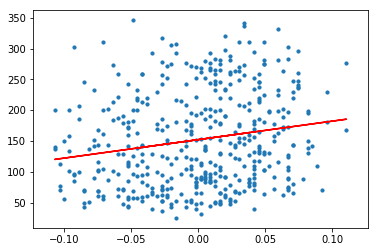

In [155]:
plt.scatter(X[:,0],y, s=10)
O = X[:,0]
O_ = np.hstack((np.ones((np.shape(X[:,0])[0],1)),np.c_[X[:,0]]))
reg.fit(O_,Y)
y_pred = reg.predict(O_)
plt.plot(X[:,0], y_pred, color='r')
plt.show()

In [3]:
reg.intercept_

152.13348416289645

Computing regularization path using the LARS ...
.

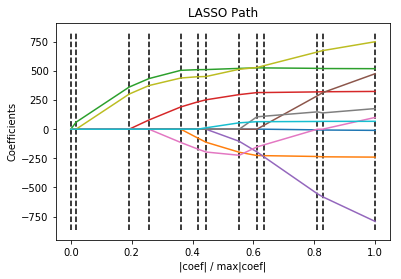

In [4]:
print("Computing regularization path using the LARS ...")
_, _, coefs = lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [8]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

In [14]:
from ipywidgets import interact
def square(x):
    return plt.scatter(x,x * x)

In [15]:
interact(square, x=10);


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [17]:
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target

In [40]:
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
#x = x.reshape(-1, 1)
y = 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5

'''O = x
if p>=2:
    for i in range(2,p+1):
        O = np.vstack((O,x**i))
    O_ = np.hstack((np.ones((201,1)),np.c_[O.T]))
else:
    O = O
    O_ = np.hstack((np.ones((201,1)),np.c_[x]))
plt.scatter(x,y, s=10)
a = gradientDescentRegression(np.c_[O.T],y,0.01,2000)
print(a)
y_pred = np.dot(O_,a)
plt.plot(x, y_pred, color='r')
plt.show()'''

"O = x\nif p>=2:\n    for i in range(2,p+1):\n        O = np.vstack((O,x**i))\n    O_ = np.hstack((np.ones((201,1)),np.c_[O.T]))\nelse:\n    O = O\n    O_ = np.hstack((np.ones((201,1)),np.c_[x]))\nplt.scatter(x,y, s=10)\na = gradientDescentRegression(np.c_[O.T],y,0.01,2000)\nprint(a)\ny_pred = np.dot(O_,a)\nplt.plot(x, y_pred, color='r')\nplt.show()"

In [131]:
def LarsLasso(sigma,ALPHA,MAX_ITER):
    X = np.arange(0, 20.1, 0.1)
    np.random.seed(0)
    Y = 6*X**2 - 5*X - 6 + np.random.randn(len(X))*sigma
    reg = LassoLars(alpha=ALPHA,max_iter=MAX_ITER)
    X = X/np.max(X)
    O = X
    O_ = np.hstack((np.ones((201,1)),np.c_[X]))
    reg.fit(O_,Y)
    theta = reg.coef_
    plt.scatter(X,Y, s=10)
    y_pred = reg.predict(O_)
    plt.plot(X, y_pred, color='r')
    plt.show()
    #return X,Y, y_pred

In [142]:
interact(LarsLasso, sigma = (0, 1e3, 10),ALPHA = (0, 20, 1),MAX_ITER = (0, 10, 1))

interactive(children=(FloatSlider(value=500.0, description='sigma', max=1000.0, step=10.0), IntSlider(value=10…

<function __main__.LarsLasso(sigma, ALPHA, MAX_ITER)>

In [116]:
def x_values(sigma,ALPHA,MAX_ITER): 
    a,b,c = LarsLasso(sigma,ALPHA,MAX_ITER)
    return a
def y1_values(sigma,ALPHA,MAX_ITER): 
    a,b,c = LarsLasso(sigma,ALPHA,MAX_ITER)
    return b
def y2_values(sigma,ALPHA,MAX_ITER): 
    a,b,c = LarsLasso(sigma,ALPHA,MAX_ITER)
    return c
'''
opts = {
    'xlim': (0, 50),
    'ylim': (0, 55),
    'animation_duration': 250,
}'''



"\nopts = {\n    'xlim': (0, 50),\n    'ylim': (0, 55),\n    'animation_duration': 250,\n}"

In [125]:
nbi.scatter(x_values, y1_values, sigma = (0, 1e5, 1e2),ALPHA = (0, 2, 0.01),MAX_ITER = (0, 20, 1))
nbi.line(x_values, y2_values, sigma = (0, 1e5, 1e2),ALPHA = (0, 2, 0.01),MAX_ITER = (0, 20, 1))


In [124]:
def x_values(n): return np.random.choice(100, n)
def y_values(xs): return np.random.choice(100, len(xs))

nbi.scatter(x_values, y_values, n=(0,200))

In [ ]:
def Lars_Path(sigma,ALPHA,MAX_ITER):
    X = np.arange(0, 20.1, 5)
    np.random.seed(0)
    Y = 6*X**2 - 5*X - 6 + np.random.randn(len(X))*sigma
    X = X/np.max(X)
    O = X
    O_ = np.hstack((np.ones((5,1)),np.c_[X]))
    _, _, coefs = lars_path(X, Y, method='lasso', verbose=True)
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title('LASSO Path')
    plt.axis('tight')
    plt.show()